# Stage 1 - Data Understanding 
This stage loads in the data and then 
looks at the data using functions such as
describe() and shape to get a better understanding
of what the data contains. 







In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import warnings
from sklearn import tree
import graphviz 
from sklearn.linear_model import LinearRegression
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Upload csv file
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
#Import data source
data = pd.read_csv(io.StringIO(uploaded['StudentsPerformance.csv'].decode('utf-8')))
%load_ext google.colab.data_table

#Create column mean scores to get average mark across all subjects 
data["mean_scores"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3

#Creating a pass or fail column that is set based on the the mean score of a student
#1 = Pass, 0 = Fail
data['Passed'] = np.where(data['mean_scores'] >= 40, 1, 0)

In [ ]:
#View the different columns in the dataset
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
#View the shape of the data
data.shape

(1000, 8)

In [ ]:
#View data types of each column
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
#Views some stats about the data
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,1
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,1
998,female,group D,some college,standard,completed,68,78,77,74.333333,1


# **Charts**


In [ ]:
#Pie chart to see the distribution of groups
groupA = data['group A'].value_counts()
groupB = data['group B'].value_counts()
groupC = data['group C'].value_counts()
groupD = data['group D'].value_counts()
groupE = data['group E'].value_counts()

x = [groupA, groupB, groupC, groupD, groupE]
labels = 'group A', 'group B', 'group C', 'group D', 'group E'

fig, ax = plt.subplots()
ax.pie(x, labels=labels)
ax.set_title('Group Distribution')
plt.tight_layout()

KeyError: ignored

In [ ]:
print(data['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


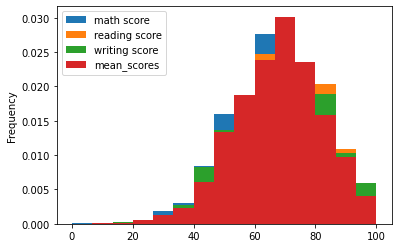

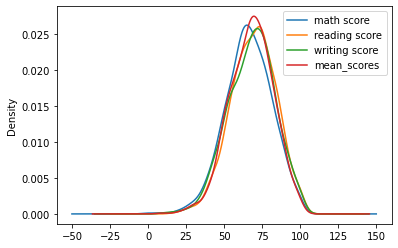

In [ ]:
#Distribution of exam scores and histogram
data.plot(kind = "hist", density = True, bins = 15)
data.plot(kind = "kde");

In [ ]:
def groupbyFunction(data, feature):
    # The function is used to analyze the mean of the features given and their situation in the data.
    values = data[feature].value_counts()
    featureAnalysis = data.groupby(feature).mean()
    return values,featureAnalysis   
    
    

groupbyFunction(data, "parental level of education")

(some college          226
 associate's degree    222
 high school           196
 some high school      179
 bachelor's degree     118
 master's degree        59
 Name: parental level of education, dtype: int64,
                              math score  ...  mean_scores
 parental level of education              ...             
 associate's degree            67.882883  ...    69.569069
 bachelor's degree             69.389831  ...    71.923729
 high school                   62.137755  ...    63.096939
 master's degree               69.745763  ...    73.598870
 some college                  67.128319  ...    68.476401
 some high school              63.497207  ...    65.108007
 
 [6 rows x 4 columns])

Based on this, students of parents who graduated with a master's degree or bachelor degree tend to do better in exams. 

In [ ]:
groupbyFunction(data, "race/ethnicity")

(group C    319
 group D    262
 group B    190
 group E    140
 group A     89
 Name: race/ethnicity, dtype: int64,
                 math score  reading score  writing score  mean_scores
 race/ethnicity                                                       
 group A          61.629213      64.674157      62.674157    62.992509
 group B          63.452632      67.352632      65.600000    65.468421
 group C          64.463950      69.103448      67.827586    67.131661
 group D          67.362595      70.030534      70.145038    69.179389
 group E          73.821429      73.028571      71.407143    72.752381)

Group E has the best scores overall

In [ ]:
groupbyFunction(data, "gender")

(female    518
 male      482
 Name: gender, dtype: int64,
         math score  reading score  writing score  mean_scores
 gender                                                       
 female   63.633205      72.608108      72.467181    69.569498
 male     68.728216      65.473029      63.311203    65.837483)

Males do better at maths but females do better in reading and writing.
Females also have a higher average score

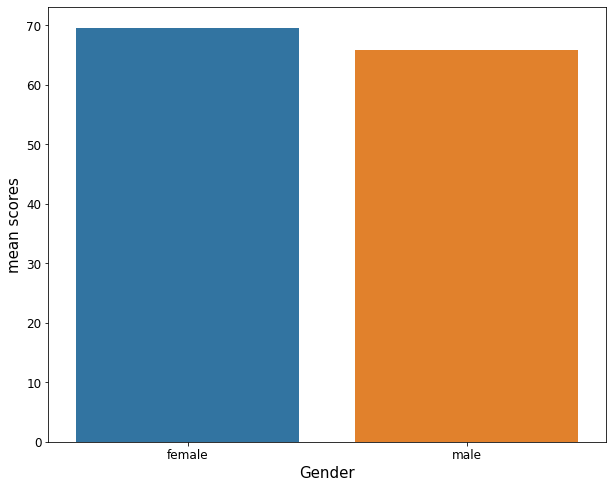

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data = data, x = 'gender', y = 'mean_scores', ci = False)
plt.xticks(fontsize = 12)
plt.xlabel('Gender', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel('mean scores', fontsize = 15)
plt.show()

Bar chart showing the same results as the group by function

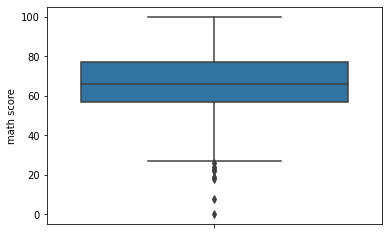

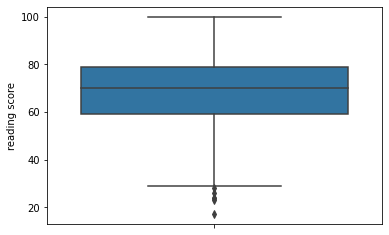

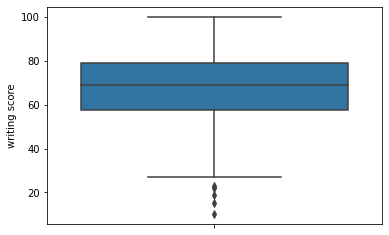

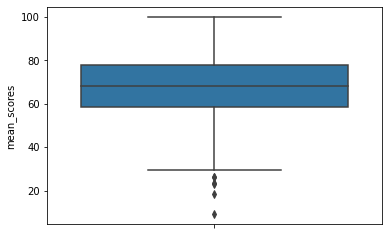

In [ ]:
#Box plots to look at outliers 
sns.boxplot(y = data["math score"])
plt.show()

sns.boxplot(y = data["reading score"] )
plt.show()

sns.boxplot(y = data["writing score"])
plt.show()

sns.boxplot(y = data["mean_scores"])
plt.show()

The box plots give a good idea of where most of the students are scoring in exams. 

In [ ]:
data.corr()

,math score,reading score,writing score,mean_scores
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
mean_scores,0.918746,0.970331,0.965667,1.000000


Shows correlation between the columns

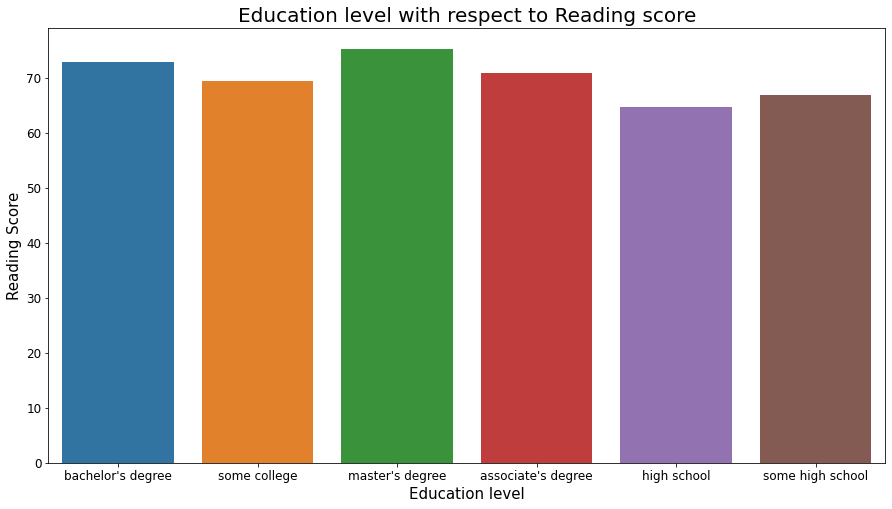

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = data, x = 'parental level of education', y = 'reading score', ci = False)
plt.xlabel('Education level', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Reading Score', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Education level with respect to Reading score', fontsize = 20)
plt.show()

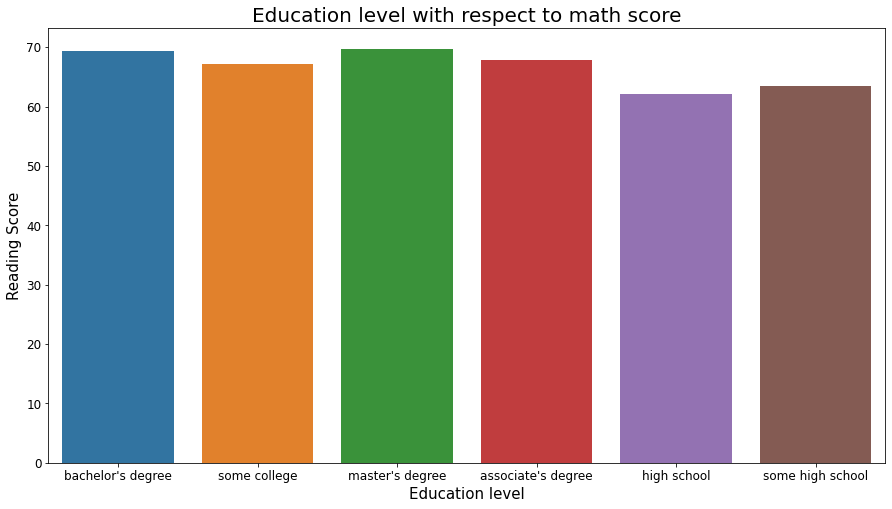

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = data, x = 'parental level of education', y = 'math score', ci = False)
plt.xlabel('Education level', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Reading Score', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Education level with respect to math score', fontsize = 20)
plt.show()

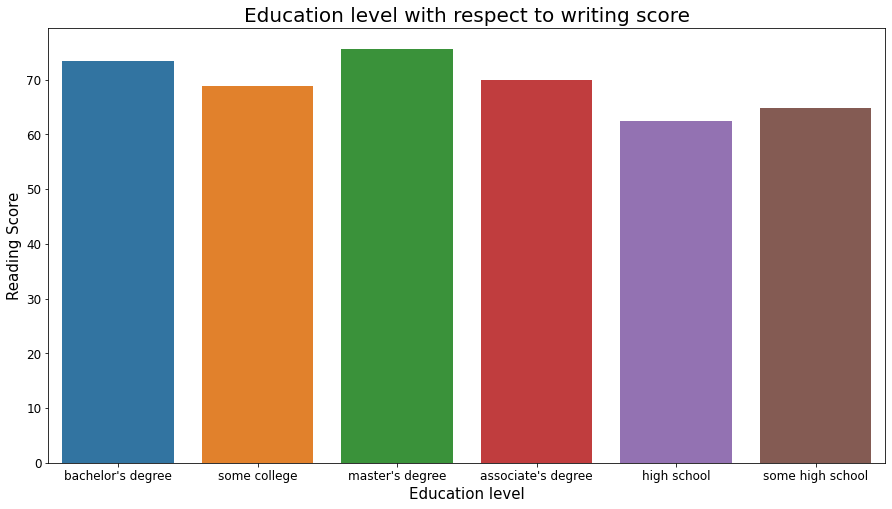

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = data, x = 'parental level of education', y = 'writing score', ci = False)
plt.xlabel('Education level', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Reading Score', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Education level with respect to writing score', fontsize = 20)
plt.show()

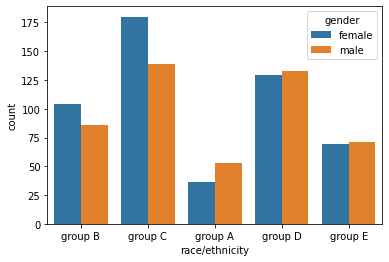

In [ ]:
sns.countplot(data = data,x = 'race/ethnicity', hue = 'gender')

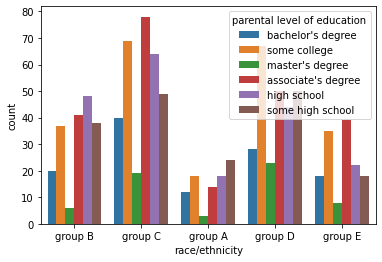

In [ ]:
sns.countplot(data = data,x = 'race/ethnicity', hue = 'parental level of education')

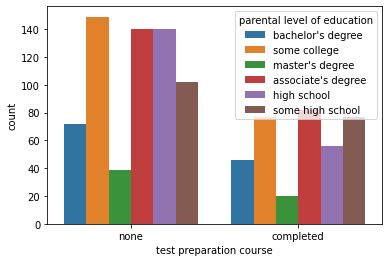

In [ ]:
sns.countplot(data = data,x = 'test preparation course', hue = 'parental level of education')

# Stage 2 - Determine a question that may be answered
At this stage, it is decided what is to be done with the data. Ask a question that can hopefully be answered. What questions are we trying to answer? 


Can you predict whether a student has passed or failed based on their background traits ? 
Pass or Fail is determined by the students mean/average score. 
A score of 40 and over is considered a pass. 

# Stage 3 - Examine the Data
In this stage the data is examined more closely and the following questions should be asked:
- Is the data complete ? 
- Is the data correct? Are there any errors, how common are they ?
- Are there any missing values ? Where do they occur? Are they common?

After examining these possible problems, give the results of the data quality report. If problems exist, give possilbe solutions for them. 

Once the data being used has been decided it needs to be prepared for the next stage. 
- Which columns will be used and why?
- Clean the data to raise the quality
- Perform label encoding if necessary
- Remove the uneccessary columns 
- Alter data types if necessary
- Removing 0's from data if needed
- Removing duplicate values if needed

Once data cleaning is done, next is to construct the dataset that is going to be used for the model. 
- Merge the datasets if there is more than one
- Split the data into training and test dat

In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean_scores                    0
dtype: int64

There are no null values in the data so we don't need to remove any. 

In [ ]:
data.isna().sum()

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean_scores                    0
Passed                         0
dtype: int64

The dataset doesn't contain missing or empty values so there won't be much data cleaning to do for it. 

In [ ]:
#Seeing if the data is unbalanced
data[['Passed']].eq(1).sum()

Passed    970
dtype: int64

The data is very much unbalanced and this issue will need to be addressed. 

In [ ]:
#Label encoding. Change all the relevant columns that have ordinal values
#Parental Education, Test Preparation course. 
modifiedData = data

#parent education
modifiedData['parental level of education'] = modifiedData['parental level of education'].astype('category')
modifiedData['parental level of education'] = modifiedData['parental level of education'].cat.codes

#test prep course
modifiedData['test preparation course'] = modifiedData['test preparation course'].astype('category')
modifiedData['test preparation course'] = modifiedData['test preparation course'].cat.codes

All of the categorical columns have been changed into numerical values that can
be used for the modelling stage. 

In [ ]:
#Modify gender column
modifiedData = pd.concat([modifiedData,pd.get_dummies(data['gender'], prefix='gender')],axis=1)

In [ ]:
#Modify race column
modifiedData = pd.concat([modifiedData,pd.get_dummies(data['race/ethnicity'], prefix='group')],axis=1)

In [ ]:
#Modify lunch column
modifiedData = pd.concat([modifiedData,pd.get_dummies(data['lunch'], prefix='lunch')],axis=1)

In [ ]:
modifiedData.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores,Passed,gender_female,gender_male,group_group A,group_group B,group_group C,group_group D,group_group E,lunch_free/reduced,lunch_standard
0,female,group B,1,standard,1,72,72,74,72.666667,1,1,0,0,1,0,0,0,0,1
1,female,group C,4,standard,0,69,90,88,82.333333,1,1,0,0,0,1,0,0,0,1
2,female,group B,3,standard,1,90,95,93,92.666667,1,1,0,0,1,0,0,0,0,1
3,male,group A,0,free/reduced,1,47,57,44,49.333333,1,0,1,1,0,0,0,0,1,0
4,male,group C,4,standard,1,76,78,75,76.333333,1,0,1,0,0,1,0,0,0,1


Performing one hot encoding on the gender column to seperate it into two separate columns that have a 0 or 1. 

Next is to drop the unecessary columns, in this case that is the math_score, reading_score, writing_score, mean_score, gender, lunch and race/ethnicity. 

In [ ]:
mod2Data = modifiedData

In [ ]:
mod2Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores,Passed,gender_female,gender_male
0,female,1,1,1,1,72,72,74,72.666667,1,1,0
1,female,2,4,1,0,69,90,88,82.333333,1,1,0
2,female,1,3,1,1,90,95,93,92.666667,1,1,0
3,male,0,0,0,1,47,57,44,49.333333,1,0,1
4,male,2,4,1,1,76,78,75,76.333333,1,0,1


In [ ]:
del_col_list = ['math score', 'reading score', 'writing score', 'mean_scores', 'gender', 'race/ethnicity', 'lunch']

mod2Data = modifiedData.drop(del_col_list, axis=1)
mod2Data.head()

,parental level of education,test preparation course,Passed,gender_female,gender_male,group_group A,group_group B,group_group C,group_group D,group_group E,lunch_free/reduced,lunch_standard
0,1,1,1,1,0,0,1,0,0,0,0,1
1,4,0,1,1,0,0,0,1,0,0,0,1
2,3,1,1,1,0,0,1,0,0,0,0,1
3,0,1,1,0,1,1,0,0,0,0,1,0
4,4,1,1,0,1,0,0,1,0,0,0,1


# Stage 4 - Develop a model(s) and train it. 
Decide on the model that will be used for the data

Model assumptions
- Assuming that there is no missing values, uniform distributions

Build the model

Describe the resulting model(s)

For this project, a linear SVC will be used. This is based on the scikit learn cheat sheet. 

The necessary packages have been imported so next is to split the data into x and y. X is what we will use for our prediction. Y is what we are trying to predict here. 



In [ ]:
#Set our original data variable to the newly changed one
data = mod2Data
data.head()

,parental level of education,test preparation course,Passed,gender_female,gender_male,group_group A,group_group B,group_group C,group_group D,group_group E,lunch_free/reduced,lunch_standard
0,1,1,1,1,0,0,1,0,0,0,0,1
1,4,0,1,1,0,0,0,1,0,0,0,1
2,3,1,1,1,0,0,1,0,0,0,0,1
3,0,1,1,0,1,1,0,0,0,0,1,0
4,4,1,1,0,1,0,0,1,0,0,0,1


In [ ]:
data

,parental level of education,test preparation course,Passed,gender_female,gender_male,group_group A,group_group B,group_group C,group_group D,group_group E,lunch_free/reduced,lunch_standard
0,1,1,1,1,0,0,1,0,0,0,0,1
1,4,0,1,1,0,0,0,1,0,0,0,1
2,3,1,1,1,0,0,1,0,0,0,0,1
3,0,1,1,0,1,1,0,0,0,0,1,0
4,4,1,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,1,1,0,0,0,0,0,1,0,1
996,2,1,1,0,1,0,0,1,0,0,1,0
997,2,0,1,1,0,0,0,1,0,0,1,0
998,4,0,1,1,0,0,0,0,1,0,0,1


In [ ]:
#Seperate the dataset
x = data.drop('Passed', axis = 1)
y = data.Passed

In [ ]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_scores
0,female,group B,1,standard,1,72,72,74,72.666667
1,female,group C,4,standard,0,69,90,88,82.333333
2,female,group B,3,standard,1,90,95,93,92.666667
3,male,group A,0,free/reduced,1,47,57,44,49.333333
4,male,group C,4,standard,1,76,78,75,76.333333


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Passed, dtype: int64

In [ ]:
#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [ ]:
#Create Linear SVC model
linearSVC = LinearSVC(verbose=0)

Now that we have created the model and the appropiate datasets, it is time to now train the data. 
To deal with the data imbalance, I will be applying undersampling to it. 

In [ ]:
#Train the model
#Results without dealing with dealing with the imbalance of the dataset
#linearSVC.fit(x_train, y_train)
#score = linearSVC.score(x_train, y_train)
print("Score: ", score)
#Score =  0.9694117647058823

Score:  0.9694117647058823


In [ ]:
print("Before undersampling: ", Counter(y_train))
#Before undersampling:  Counter({1: 824, 0: 26})

Before undersampling:  Counter({1: 824, 0: 26})


In [ ]:
print("After undersampling: ", Counter(y_train_under))
#After undersampling:  Counter({0: 26, 1: 26})

After undersampling:  Counter({0: 24, 1: 24})


In [ ]:
#Create Linear SVC model
linearSVC = LinearSVC()

undersample = RandomUnderSampler(sampling_strategy='majority')

x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

#Train the model
#Results after applying undersampling to the model
linearSVC.fit(x_train_under, y_train_under)
score = linearSVC.score(x_train_under, y_train_under)
print("Score: ", score)

Score:  0.74


The score seems to change drastically. It has gone as low as 65% and as high as 81%. It does not seem too consistent. 

In [ ]:
#Cross validation method
cv_scores = cross_val_score(linearSVC, x_train_under, y_train_under, cv=10)
print("CV average score: %.2f" % cv_scores.mean())
#Cv average score of 79% 

CV average score: 0.79


Next is to try a prediction on the test data splits. 

In [ ]:
prediction = linearSVC.predict(x_test)

confusionMatrix = confusion_matrix(y_test, prediction)
print(confusionMatrix)

[[ 5  0]
 [48 97]]


Looking at the results of this confusion matrix the success rate of the model does not look too good. It correctly guessed the 5 fails in the test data but was not very successful with predicting passes. 

In [ ]:
y_test

999    1
984    1
664    1
715    1
945    1
      ..
803    1
725    1
687    1
281    1
142    1
Name: Passed, Length: 150, dtype: int64

In [ ]:
y_test.eq(0).sum()

5

In [ ]:
cr = classification_report(y_test, prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.02      0.33      0.04         3
           1       0.98      0.66      0.79       147

    accuracy                           0.65       150
   macro avg       0.50      0.50      0.41       150
weighted avg       0.96      0.65      0.77       150



In [ ]:
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, prediction))

ROC AUC score for undersampled data:  0.4965986394557823


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
accuracy_percentage = 100 * accuracy
accuracy_percentage
#Accuracy of 70.6%
#Acurracy of 96.0

96.0

Just like the score value, the accuracy value changes frequently. It has gone as low at 70% and as high as 96%. 
Next is to try two predictions, one expecting a 1(pass) another expecting a 0(fail).  

In [ ]:
#Time to put in the values of a student and see if it predicts correctly 
#Expecting a 1 which is a pass
firstStudent = linearSVC.predict(np.array([1,1,1,0,0,1,0,0,0,0,1]).reshape(1, -1))
firstStudent[0]

1

In [ ]:
#Time to put in the values of a student and see if it predicts correctly 
#Expecting a 0 which is a fail
secondStudent = logistic_regression.predict(np.array([5,1,1,0,0,1,0,0,0,1,0]).reshape(1, -1))
secondStudent[0]

1

It was successful at predicting a one for the first time but this may be because the chances of it being a 1 are much higher than it being a 0. It did guess correctly for the failed student. 

Next would be to try and increase the accuracy of the model by trying different methods of dealing with unbalacned data as well as tweaking the model parameters. 

# Stage 5 - Evalute, refine and repeat.
Improve the performance of the model by tweaking the parameters etc. 

In this stage I am planning on tweaking the Linear SVC model in the hopes of improving the results of the model, 

In addition to this it may be worth trying a different model to see if it performs better in comparison to what was recommended by the sci-kit learn classfier sheet. 

First, I will begin with trying oversampling for dealing with the unbalanced data.  

In [ ]:
# define oversampling strategy
SMOTE = SMOTE()

TypeError: ignored

In [ ]:
#Create Linear SVC model
linearSVC = LinearSVC(verbose=0)

x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

#Train the model
#Results after applying undersampling to the model
linearSVC.fit(x_train_SMOTE, y_train_SMOTE)
score = linearSVC.score(x_train_SMOTE, y_train_SMOTE)
print("Score: ", score)

y_prediction = linearSVC.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_prediction)
accuracy_percentage = 100 * accuracy
print("Accuracy" + str(accuracy_percentage))

Score:  0.9309927360774818


96.0

The oversampling gives a significantly higher accuracy but it may be higher than expected for a first run of the model. 

Other things that could be tried are to tweak the model parameters. 

Trying out a Logistic Regressor for a second model as it may give better results. The reason for choosing logistic regression is because it is suited to predicting a binary value, in this case it is a 'Pass' or 'Fail'. A pass is a value of 1 and a fail is a value of 0. 

In [ ]:
#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [ ]:
#The dataset is unbalanced and will need to dealt with in some way. This time oversampling will be used. 
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

Before oversampling:  Counter({1: 820, 0: 30})


In [ ]:
# define oversampling strategy
SMOTE = SMOTE()

In [ ]:
# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({1: 820, 0: 820})


In [ ]:
#Create the logestic regression model
logistic_regression = LogisticRegression()

#Fit the model
#This uses the original data that did not undergo oversampling. 
logistic_regression.fit(x_train, y_train)

#Run the prediction 
y_prediction = logistic_regression.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_prediction)
accuracy_percentage = 100 * accuracy
accuracy_percentage
#accuracy 100% 

As you can see it gives 100% accuracy which is not good. 
Next is to run again using the data that underwent oversampling. 

In [ ]:
#Create the logestic regression model
logistic_regression = LogisticRegression()

#Fit the model
#This uses the data that did have oversampling. 
logistic_regression.fit(x_train_SMOTE, y_train_SMOTE)

#Run the prediction 
y_prediction = logistic_regression.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_prediction)
accuracy_percentage = 100 * accuracy
accuracy_percentage
#Accuracy 95.3 % 

96.0

In [ ]:
#Time to put in the values of a student and see if it predicts correctly 
firstStudent = logistic_regression.predict(np.array([1,1,1,0,0,1,0,0,0,0,1]).reshape(1, -1))
firstStudent[0]

1

It predicted a value of 1 which is a pass. This prediction was correct.
Now try to use value that should give a fail. 

In [ ]:
#Time to put in the values of a student and see if it predicts correctly 
secondStudent = logistic_regression.predict(np.array([5,1,1,0,0,1,0,0,0,1,0]).reshape(1, -1))
secondStudent[0]

1

This should have given a 0 or a fail for it's prediction but it was incorrect. 

The results are still quite high with an accuracy of 95%. I will try this again using the undersampling on the data this time. 

In [ ]:
#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

undersample = RandomUnderSampler(sampling_strategy='majority')

x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

#Create and train the model again 
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_under, y_train_under)

#Run the prediction 
y_prediction = logistic_regression.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_prediction)
accuracy_percentage = 100 * accuracy
accuracy_percentage
#Accuracy 70.6 % 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The undersampling used for the logistic regressor gives a much lower result but this seems a bit too low for a first run. 
I'm going to try using a decision tree classifier to see if it is more successful than the linear SVC and logestic regression. 

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')

x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

clf = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=5)
clf = clf.fit(x_train_under,y_train_under)

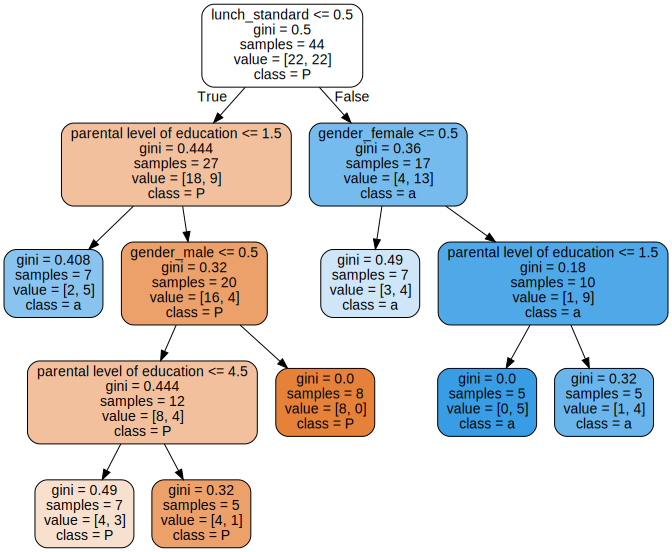

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=x_train.columns,class_names='Passed',  filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
y_pred=clf.predict(x_test) 
print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")

Accuracy:0.740 



Looking at the decision tree, it shows there are some values that are completely one sides(all pass or all fail). I believe the class value is the pass or fail value ? 

I'm going to now try and predict the values of the grades themselves rather than a pass or fail. For this I will use a linear regression model. 

In [ ]:
#Reimporting data and making some changes. 
data = pd.read_csv(io.StringIO(uploaded['StudentsPerformance.csv'].decode('utf-8')))
%load_ext google.colab.data_table

#Create column mean scores to get average mark across all subjects 
data["mean_scores"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
#Label encoding. Change all the relevant columns that have ordinal values
#Parental Education, Test Preparation course. 
#Preparing the data for the linear regression model
modifiedData = data

#parent education
modifiedData['parental level of education'] = modifiedData['parental level of education'].astype('category')
modifiedData['parental level of education'] = modifiedData['parental level of education'].cat.codes

#test prep course
modifiedData['test preparation course'] = modifiedData['test preparation course'].astype('category')
modifiedData['test preparation course'] = modifiedData['test preparation course'].cat.codes

#Modify gender column
modifiedData = pd.concat([modifiedData,pd.get_dummies(data['gender'], prefix='gender')],axis=1)

#Modify race column
modifiedData = pd.concat([modifiedData,pd.get_dummies(data['race/ethnicity'], prefix='group')],axis=1)

#Modify lunch column
modifiedData = pd.concat([modifiedData,pd.get_dummies(data['lunch'], prefix='lunch')],axis=1)

mod2Data = modifiedData

del_col_list = ['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'lunch']

mod2Data = modifiedData.drop(del_col_list, axis=1)
#mod2Data.head()

#Set our original data variable to the newly changed one
data = mod2Data
data.head()

,parental level of education,test preparation course,mean_scores,gender_female,gender_male,group_group A,group_group B,group_group C,group_group D,group_group E,lunch_free/reduced,lunch_standard
0,1,1,72.666667,1,0,0,1,0,0,0,0,1
1,4,0,82.333333,1,0,0,0,1,0,0,0,1
2,3,1,92.666667,1,0,0,1,0,0,0,0,1
3,0,1,49.333333,0,1,1,0,0,0,0,1,0
4,4,1,76.333333,0,1,0,0,1,0,0,0,1


In [ ]:
#Seperate the dataset
#Linear regression model
x = data.drop('mean_scores', axis = 1)
y = data.mean_scores

In [ ]:
#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

undersample = RandomUnderSampler(sampling_strategy='majority')

x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got continuous instead.
  TARGET_KIND, type_of_target(y)))


In [ ]:
#Create the model
linearRegression = LinearRegression()

In [ ]:
linearRegression.fit(x_train_under, y_train_under)
r_sq = linearRegression.score(x_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.1816764524532315


In [ ]:
print('intercept:', linearRegression.intercept_)
print('slope:', linearRegression.coef_)

intercept: 72.90294879580105
slope: [-0.58608453 -8.3853445   2.19195702 -2.19195702 -3.44092657 -2.23460717
 -0.54121156  2.65576636  3.56097894 -4.43123689  4.43123689]


In [ ]:
y_pred = linearRegression.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[71.73545243 78.98493115 59.37800768 66.67080816 76.0545085  73.42884804
 61.73711286 67.73402198 66.67080816 73.52960809 56.76711429 56.49305973
 68.90619104 62.58975267 57.1132946  64.93409079 63.87133448 60.5649438
 63.76192173 64.45741901 76.62582597 61.15102833 78.70320761 59.37800768
 56.18102976 74.6010171  68.25524853 59.39277474 69.97719884 73.15479349
 68.25524853 74.70177715 55.07371867 63.76192173 67.25689269 81.00974001
 63.76192173 64.34800626 67.0683124  62.58975267 74.70177715 74.6010171
 79.83757095 75.77278496 63.45906318 67.77811925 76.35886949 72.35743903
 67.38744045 69.42741759 67.14793744 79.25148642 61.73711286 78.98493115
 68.24048146 66.0505733  59.97885927 67.65439693 74.11569262 56.18102976
 62.90888072 64.34800626 63.28524995 68.90619104 75.77278496 62.90888072
 78.39884662 55.0088607  72.03831098 73.79656457 56.49305973 69.35696397
 77.29153554 65.97576838 75.77278496 60.5649438  68.34943671 76.0545085
 72.25667898 67.73402198 68.906191

In [ ]:
y_test

534    70.000000
885    72.666667
920    68.666667
514    89.333333
629    50.000000
         ...    
147    69.000000
449    75.333333
461    51.000000
107    64.333333
395    44.666667
Name: mean_scores, Length: 150, dtype: float64

Having a look at the predicted responses and the actual values, some don't seem too far off while other values appear to be quite inaccurate. 

In [ ]:
#Time to put in the values of a student and see if it predicts correctly 
firstStudent = linearRegression.predict(np.array([1,1,1,0,0,1,0,0,0,0,1]).reshape(1, -1))
firstStudent[0]

68.32010650525359

The prediction here is not too far off from the actual score of 71.6% 

In [ ]:
#Getting an idea of the models accuracy
r2_score = linearRegression.score(x_test,y_test)
print(r2_score*100,'%')

18.16764524532315 %


The value outputted doesn't make sense. It seems way too low. 

# Stage 6 - Results and Conclusion
Present findings of the research in a simple format. 

Afterwards give a personal interpreation of the results and judge whether the model was successful in answering the research question.

Conclussion to some up the entire project.




The objective of this project was to try and determine if a student had passed or failed there exams based on there background. In this case the students background consisted of things like there parents education level, completing a test preparation course and such. 

By using the sci-kit learn cheat sheet, it suggested that I use a Linear SVC model for my dataset. Before attempting to train the model, I needed to make changes to the data as it was unbalanced. I used both undersampling and oversampling to see how it affected the results. 

When I initially ran the model, the results where not too good. It was sucessful when predicting fails but not predicting passes. The accuracy metric also seemed to change drastically everytime it was run which I thought a bit strange as the difference was pretty big. 

During the next phase of trying to improve results, oversampling was tried as another way to deal with the unbalanced data. In addtion to this, I tried out other models to see if the results were better. Logestic regression and a decision tree were tried as a means of predicting a pass or fail. Neither of these models were particualrly sucessful with getting good results. 

Since I was not having much luck, I decided to try and predict students mean scores instead of simply predicting a pass or fail. For this I used a linear regression mode. After running the model I looked at the results and am not sure what to make of the accuracy value I got which was 18%??? unless I did something wrong. Looking at the actual predictions themselves, it didn't get exact matches with the values but some were very close while others had a significant difference. 

To conclude I do believe it would be possible to accurately predict a pass or fail with the right model or with some more tweaking to one of the models used. The same could be said about predicting a students score. Even though the question of the project wasn't truly answered I do believe it is possible. 

References
- https://towardsdatascience.com/univariate-logistic-regression-example-in-python-acbefde8cc14
- https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1
- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
- https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html
- https://www.w3schools.com/python/python_ml_decision_tree.asp
- https://realpython.com/linear-regression-in-python/